In [1]:
# Global imports and settings
from __future__ import print_function
from __future__ import division

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (6, 6)

<center>
    <img src="img/scikit-learn-logo.png" width="40%" />
    <br />
    <h1>An introduction to Machine Learning with Scikit-Learn</h1>
    <br /><br />
    Gilles Louppe (<a href="https://twitter.com/glouppe">@glouppe</a>), April 23, 2015
    <br /><br />
    <a href="https://github.com/glouppe/tutorial-sklearn-lhcb">https://github.com/glouppe/tutorial-sklearn-lhcb</a>
</center>

# About myself 

* PhD in machine learning, expertise in tree-based methods
* Core developer of Scikit-Learn
* Research Fellow working in GS-SIS, on graph and text mining problems
* Open to collaborations

# Outline

* What is machine learning?
* Scikit-Learn
* Classifying events
* Model evaluation and selection
* Persistence and deployment
* Unsupervised learning

# What is machine learning?

Predict, understand or identify patterns in data from observations.

Applications include: _Natural language processing, Computer vision, IR and advertisement, Robotics, Bioinformatics, __High Energy Physics__, ..._

<center><img src="img/motivation.png" width="80%" /></center>

# Scikit-Learn

## Overview

* Machine learning library written in __Python__
* __Simple and efficient__, for both experts and non-experts
* Classical, __well-established machine learning algorithms__
* __BSD 3 license__

Note: emphasize that sklearn is not research code
Note: mention documentation + examples

## Community driven development

- 10-15~ core developers (mostly researchers)
- 250+ occasional contributors
- __All working together__ on [GitHub](https://github.com/scikit-learn/scikit-learn)
- Emphasis on __keeping the project maintainable__
    - Style consistency
    - Unit-test coverage
    - Documentation and examples
    - Code review

## Python stack for data analysis

- The __open source__ Python ecosystem provides __a standalone, versatile and powerful scientific working environment__, including: [NumPy](http://numpy.org), [SciPy](http://scipy.org), [IPython](http://ipython.org), [Matplotlib](http://matplotlib.org), [Pandas](http://pandas.pydata.org/), _and many others..._
- Scikit-Learn builds upon NumPy and SciPy and __complements__ this scientific environment with machine learning algorithms;
- By design, Scikit-Learn is __non-intrusive__, easy to use and easy to combine with other libraries.

<center> 
<img src="img/scikit-learn-logo.png" style="max-width: 120px; display: inline" />
<img src="img/numpy-logo.png" style="max-width: 120px; display: inline" />
<img src="img/scipy-logo.png" style="max-width: 120px; display: inline" />
<img src="img/ipython-logo.jpg" style="max-width: 120px; display: inline" />
<img src="img/matplotlib-logo.png" style="max-width: 120px; display: inline"/>
<img src="img/pandas-logo.png" style="max-width: 120px; display: inline" />
</center>

Note: talk about speed

## A simple and unified API

All objects in scikit-learn share a uniform and limited API consisting of three complementary interfaces:

- an `estimator` interface for building and fitting models;
- a `predictor` interface for making predictions;
- a `transformer` interface for converting data.

All of them takes as input __data which is structured as Numpy arrays or sparse matrices__. 

# Classifying events

### Loading data

In [2]:
# Download data from https://archive.ics.uci.edu/ml/datasets/SUSY

# Load CSV file with pandas
import pandas as pd 
df = pd.read_csv("SUSY.csv", header=None)     
df.columns = ["target", "lepton 1 pT", "lepton 1 eta", "lepton 1 phi", 
              "lepton 2 pT", "lepton 2 eta", "lepton 2 phi", 
              "missing energy magnitude", "missing energy phi", "MET_rel", 
              "axial MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", 
              "dPhi_r_b", "cos(theta_r1)"]
df.target = df.target.astype(int)               

### Exploration and visualization with `pandas`

In [3]:
df.describe()

,target,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
count,5000000.000000,5000000.000000,5000000.000000,5000000.000000,5000000.000000,5000000.000000,5000000.000000,5000000.000000,5000000.000000,5.000000e+06,5000000.000000,5000000.000000,5000000.000000,5000000.000000,5000000.000000,5000000.000000,5000000.000000,5000000.000000,5.000000e+06
mean,0.457565,1.000318,0.000022,-0.000050,0.999430,-0.000037,-0.000020,0.999974,0.000035,1.001437e+00,-0.000049,1.000360,0.999956,0.999916,1.000422,1.000112,1.000192,0.999485,2.249139e-01
std,0.498196,0.687334,1.003107,1.001670,0.654220,1.002839,1.001631,0.872888,1.001654,8.901668e-01,1.001594,0.628845,0.584114,0.470841,0.859249,0.620716,0.623767,0.436095,1.969804e-01
min,0.000000,0.254882,-2.102927,-1.734789,0.428586,-2.059306,-1.734202,0.000260,-1.727117,7.693475e-08,-16.718634,0.267307,0.001041,0.002048,0.000000,0.027341,0.004453,0.000000,4.172130e-08
25%,0.000000,0.562484,-0.757351,-0.867357,0.596988,-0.769592,-0.868374,0.478455,-0.866151,3.691849e-01,-0.492398,0.588329,0.622341,0.650544,0.170522,0.598521,0.513439,0.687913,6.908188e-02
50%,0.000000,0.791551,0.000134,-0.000388,0.799799,-0.000379,0.000201,0.773836,-0.009173,8.019273e-01,-0.080379,0.828611,0.878131,0.934470,0.901839,0.835534,0.914251,1.094396,1.672500e-01
75%,1.000000,1.204413,0.757649,0.867098,1.162353,0.769230,0.867478,1.207444,0.868762,1.375392e+00,0.348901,1.211083,1.220313,1.283522,1.613231,1.207994,1.384583,1.369183,3.303652e-01
max,1.000000,20.553450,2.101605,1.734839,33.035622,2.059721,1.734686,21.068876,1.740689,2.338644e+01,20.487904,21.075718,16.166821,6.731210,20.686245,21.152262,15.613705,1.591660,1.000000e+00


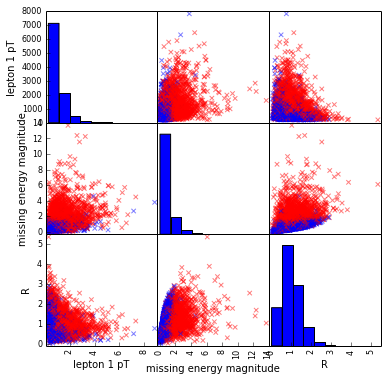

In [22]:
df_sample = df[:10000]
colors = ["blue",  # 0 = background
          "red"]   # 1 = signal
features = ["lepton 1 pT", "missing energy magnitude", "R"]

_ = pd.scatter_matrix(df_sample[features], marker="x", 
                      c=df_sample.target.apply(lambda x: colors[x]))

Need more? See `pandas` <a href="http://pandas.pydata.org/pandas-docs/stable/visualization.html">visualization</a> documentation.

### Supervised learning framework

### Estimators

In [73]:
# Import estimator class 
from sklearn.ensemble import RandomForestClassifier

# Set hyper-parameters, for controlling the learning algorithm
clf = RandomForestClassifier(max_depth=10)

# Learn a model from training data
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Predictors

In [71]:
# Make predictions on new data
print(clf.predict([[4.1, 4.5, 1.2, 0.3]]))

[0]


In [38]:
# Compute class probabilities
print(clf.predict_proba([[4.1, 4.5, 1.2, 0.3]]))

[[ 1.  0.  0.]]


## Interpretation

- var importances
- partial dependence plots

## Need another estimator?

<center>
    <img src="img/classifiers.png" />
    Check the Scikit-Learn <a href="http://scikit-learn.org/dev/modules/classes.html">reference API</a>!
</center>

# Model evaluation and selection

- Selection versus evaluation
- Parameter search
- Cross-validation
- Under/over-fitting

## Selection and evaluation

## Cross-validation

## Parameter search

## Under/over-fitting

- plot
- regularization

# Model persistence

# Unsupervised learning

## Clustering

## Density estimation

## Decomposition

# Going further

- Add references to tutorials, packages, etc